<a href="https://colab.research.google.com/github/ykim879/machine.learning.soccer/blob/gh-pages/Copy_of_Soccer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import files
#files = files.upload()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,decomposition
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

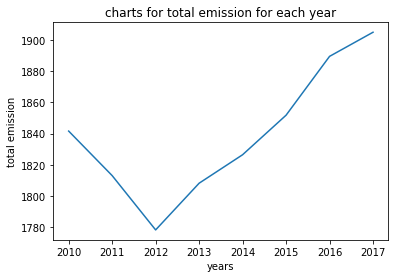

In [3]:
carbon_emission = pd.read_excel("transportation.xlsx")
carbon_emission = carbon_emission.drop(index = {54,55,56,57})
from_ten_to_sixteen = carbon_emission.iloc[:,-10:-2]
from_ten_to_sixteen = from_ten_to_sixteen.drop(index = 53)
total_emission = carbon_emission.loc[53].tolist()[1:-1]
years = carbon_emission.loc[1].tolist()[1:-1]
states = carbon_emission.iloc[:,0]
states = states.drop(index = {0,1})
plt.plot(years[-9:-1], total_emission[-9:-1])
plt.xlabel('years')
plt.ylabel('total emission')
plt.title('charts for total emission for each year')
plt.show()

In [4]:
#the datasets
#from_ten_to_sixteen = carbon emssion for each states between 2010 to 2017 (index = 0: years, others: emission for each state)
#carbon_emission: dataset directly from transportaition
#total emission: total emission for each state from 2014 to 2017
#states: name of the states
from_ten_to_sixteen, carbon_emission,total_emission,states

(    Unnamed: 31  Unnamed: 32  Unnamed: 33  Unnamed: 34  Unnamed: 35  \
 0           NaN          NaN          NaN          NaN          NaN   
 1        2010.0       2011.0       2012.0       2013.0       2014.0   
 2          32.2         32.3         31.8         31.6         31.6   
 3          14.9         14.2         13.3         12.3         11.7   
 4          31.5         31.2         30.7         31.1         31.3   
 5          19.6         19.4         18.7         18.7         19.0   
 6         208.9        201.7        196.8        197.6        200.0   
 7          29.0         28.0         27.9         27.5         28.2   
 8          15.7         15.5         15.1         15.1         15.1   
 9           4.3          4.1          4.2          4.1          4.2   
 10          1.0          1.1          1.0          1.0          1.1   
 11        104.0        102.4         99.4        100.0        101.1   
 12         65.5         64.0         57.5         55.9         

In [5]:
#from index 2 to 52 will be dimension
state = carbon_emission.loc[2].tolist()
data = carbon_emission.iloc[2:52,-7:-2].to_dict()#from 2013 to 2017
x_data = np.zeros((5,50))#dimension is emission from states and each data is each year
for i in range(len(data)):
    column = 'Unnamed: '+ str(i+34)
    print(column)
    x_data[i] = list(data[column].values())
    print(x_data[i])

Unnamed: 34
[ 31.6  12.3  31.1  18.7 197.6  27.5  15.1   4.1   1.  100.   55.9   9.9
   9.2  63.7  42.5  20.3  19.5  29.9  45.4   8.8  28.3  30.4  48.7  30.
  24.9  37.1   8.1  13.4  14.2   6.7  58.3  13.7  68.5  49.1   9.4  62.6
  30.6  20.7  61.    3.9  30.9   6.5  40.6 208.3  17.1   3.3  49.7  41.4
  11.1  28. ]
Unnamed: 35
[ 31.6  11.7  31.3  19.  200.   28.2  15.1   4.2   1.1 101.1  53.5   9.9
   9.3  65.   43.3  20.9  20.5  30.8  44.3   8.8  27.7  28.8  48.2  30.2
  25.8  37.7   7.8  13.9  14.1   6.7  58.8  14.3  72.9  49.2  10.   63.5
  32.7  20.8  60.8   4.1  30.2   6.7  41.6 211.6  16.8   3.3  48.8  40.5
  11.1  30.2]
Unnamed: 36
[ 32.9  12.2  31.9  18.8 205.6  27.9  15.1   4.4   1.1 104.8  56.3  10.1
  10.3  67.9  43.4  20.2  19.   31.6  47.8   8.8  28.4  29.7  49.4  29.8
  26.5  37.5   7.6  13.8  14.3   6.7  58.3  14.4  71.2  48.2   9.2  63.5
  32.2  20.3  59.5   4.1  31.8   6.8  42.3 216.4  17.3   3.3  47.2  43.2
  11.4  29.7]
Unnamed: 37
[ 34.7  11.8  33.   19.4 212.7  28.

# Linear Regression

#### read the data
dataset for linear regression

In [6]:
import pandas as pd
import numpy as np
dataset = pd.read_excel("linear_regression_data_(co2_EV_sales).xlsx")
dataset = dataset.iloc[:,1:]
dataset

,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,CO2 emissions (million metric tons of carbon d...,EV sales (#of vehicles),Total car sales (# of vehicles)
1,1813,9178,12695712
2,1778.1,12820,15376264
3,1808.1,46832,15490245
4,1826.4,60363,16424017
5,1851.8,477674,17404970
6,1889.6,483753,17500719
7,1905.1,95610,17212565
8,1950,203625,17323849


#### sort the dataset for linear regression
y: CO2 emissions
x1: EV sales
x2: total car sales
n_total: total number of x data (which is same for y
slope: the growth of CO2 emission by 

In [7]:
import numpy as np
co2emissions = np.asarray(dataset.iloc[1:,0].tolist())
evsales = np.asarray(dataset.iloc[1:,1].tolist())
totalcarsales = np.asarray(dataset.iloc[1:,2].tolist())
nonevsales = totalcarsales-evsales
n_total = len(co2emissions)
co2emissions, evsales, totalcarsales, nonevsales,n_total

(array([1813. , 1778.1, 1808.1, 1826.4, 1851.8, 1889.6, 1905.1, 1950. ]),
 array([  9178,  12820,  46832,  60363, 477674, 483753,  95610, 203625]),
 array([12695712, 15376264, 15490245, 16424017, 17404970, 17500719,
        17212565, 17323849]),
 array([12686534, 15363444, 15443413, 16363654, 16927296, 17016966,
        17116955, 17120224]),
 8)

In [8]:
#slope by the least squares fit
x_normal = x - x.sum()
y_normal = y - y.sum()/n_total
xdoty = np.dot(x_normal.T, y_normal)
xsquare = np.dot(x_normal.T, x_normal)
slope = xdoty/xsquare
slope

NameError: name 'x' is not defined

In [9]:
#slope by scikit linear regression
from sklearn import datasets, linear_model,decomposition
reg = linear_model.LinearRegression()
x1 = np.zeros((n_total, 2))
x1[:,0] = evsales
x1[:,1] = nonevsales
y1 = co2emissions.reshape(-1,1)
reg.fit(x1,y1)
pred = reg.predict(x1)
reg.set_params(normalize = True)
pred,reg.coef_,reg.intercept_,pred.shape

(array([[1774.54098826],
        [1832.64933002],
        [1835.69672802],
        [1856.14761823],
        [1884.49608043],
        [1886.67300624],
        [1873.8235358 ],
        [1878.07271299]]),
 array([[3.86834074e-05, 2.16546155e-05]]),
 array([1499.4639361]),
 (8, 1))

## caculate constant

In [11]:
constant = pred[0] - (reg.coef_[0,0]*x1[0,0] + reg.coef_[:,1]*x1[0,1])
constant

array([1499.4639361])

(1, 100) (100, 1)


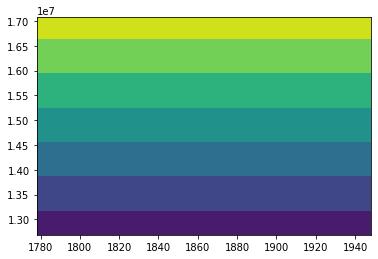

In [20]:
#generate prediction data for the plane
possible_ev = np.arange(1778,1950,(1950-1778)/100)
min_ = np.amin(nonevsales)
max_ = np.amax(nonevsales)
possible_non = np.arange(min_, max_, (max_ - min_)/100)
possible_ev.shape, possible_non.shape 
possible_x = np.zeros((20, 2))
#possible_x[:,0] = possible_ev
#possible_x[:,1] = possible_non
pred = reg.predict(possible_x)
xx, yy = np.meshgrid(possible_ev, possible_non, sparse=True)
#z = np.zeros((20,20))
print(xx.shape, yy.shape)
#for x in range(20):
#    for y in range(20):
#        z[x,y] = reg.coef_[:,0]*xx[:,x] + reg.coef_[:,1]*yy[y]
mez = reg.coef_[:,0]*xx + reg.coef_[:,1]*yy + constant
h = plt.contourf(possible_ev,possible_non,mez)
#possible_non = np.arrage

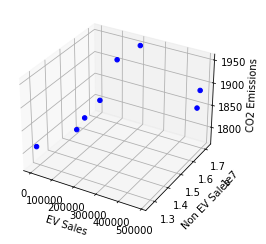

In [21]:
#plotting linear regression
fig = plt.figure(1778)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(evsales,nonevsales,co2emissions,c='blue',marker='o',alpha=1)
ax.plot_surface(xx, yy, mez, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('EV Sales')
ax.set_ylabel('Non EV Sales')
ax.set_zlabel('CO2 Emissions')
#x_surf, y_surf = np.meshgrid(np.linspace(evsales.min(), evsales.max(), n_total),np.linspace(nonevsales.min(), nonevsales.max(), n_total))
#ax.plot_surface(x_surf,y_surf,pred.reshape(x_surf.shape), color='None', alpha=0.01)
plt.show()

In [ ]:
#prediction using pca
combine = np.column_stack((x,y)).T
pca = decomposition.PCA(n_components = 1)
combine_pca = pca.fit_transform(combine)

In [ ]:
plotline(x,y,combine[:,0],combine[:,1],'deeppink',1)
plt.show()